**Название проекта:**

Проверка гипотез по увеличению выручки в интернет-магазине —
оценить результаты A/B теста

**Цель исследования:** 

Анализ результатов проверки выбвинутых гипотез методом А/В-тестов.



**Ход исследования:**
1. Загрузка данных и подготовка их к анализу 
2. Приоритизация гипотез
3. Анализ A/B-теста
4. Решение по результатам теста



**Краткое описание проекта:**

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Задача приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.



**Описание начальных данных:**

*1. Датасет hypothesis*
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

*2. Датасет orders*
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

*3. Датасет visitors*
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# 1. Загрузка данных и подготовка их к анализу

## 1.1. Обзор данных

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [ ]:
# загружаем данные - гипотезы
hypothesis = pd.read_csv('/content/drive/MyDrive/ЯПрактикум - АЛЛА/Спринт 9. Принятие решений в бизнесе/hypothesis.csv')

In [ ]:
# загружаем данные - заказы
orders = pd.read_csv('/content/drive/MyDrive/ЯПрактикум - АЛЛА/Спринт 9. Принятие решений в бизнесе/orders.csv')

In [ ]:
# загружаем данные - пользователи
visitors = pd.read_csv('/content/drive/MyDrive/ЯПрактикум - АЛЛА/Спринт 9. Принятие решений в бизнесе/visitors.csv')

In [ ]:
# откроем таблицу hypothesis и посмотрим общую информацию о ней
hypothesis.info()
hypothesis.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [ ]:
# откроем таблицу orders и посмотрим общую информацию о ней
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# откроем таблицу visitors и посмотрим общую информацию о ней
visitors.info()
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## 1.2. Предобработка данных

In [ ]:
# приведем названия столбцов в таблице hypothesis к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
# проверим результат
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [ ]:
# приведем названия столбцов в таблице orders к нижнему регистру
orders.columns = orders.columns.str.lower()
# проверим результат
orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [ ]:
# преобразуем данные о времени
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
# преобразуем данные о времени
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
# проверим данные на наличие дубликатов
hypothesis.duplicated().sum()

0

In [ ]:
# проверим данные на наличие дубликатов
orders.duplicated().sum()

0

In [ ]:
# проверим данные на наличие дубликатов
visitors.duplicated().sum()

0

**в данном разделе мы:**
- исправили наименования столбцов, привели наименования в соотвествие с хорошим стилем
- преобразовали данные о времени
- проверили данные на наличие дубликатов

# 2. Приоритизация гипотез

## 2.1. Изучение 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort

In [ ]:
# применим фреймворк ICE для приоритизации гипотез
pd.options.display.max_colwidth = 150
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [ ]:
# применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В случае ICE наиболее преспективными являются гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

В случае RICE: 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Приоритизация гипотез изменилась. Так получилось в связи с влиянием параметра Reach в методе RICE (чем он выше, тем выше влияние).
Т.е. кроме силы гипотез, необходимо учитывать и то, как много пользователей она затронет.

# 3. Анализ A/B-теста

Перед сбором кумулятивных данных еще раз оценим исходные данные:

In [ ]:
# всего покупателей
orders['visitorid'].nunique()

1031

In [ ]:
# общее число покупателей по группам
orders.groupby('group').agg({'visitorid': 'nunique'}).sum()[0]

1089

Видим, что группы по размеру разные. Причины могут быть различные. В данном случае это можно объяснить более эффективной работой с пользователями в группе В. Возможно, причина просто в лучшей конверсии. Разница в данном случае не значительна. В целом данные собраны и над исследованием нужно продолжить работу.

**Для построения графиков соберем кумулятивные данные**

Объявим датафрейм cumulativeData со столбцами:
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

## 3.1. График кумулятивной выручки по группам

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()


In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
 
# получим строки таблицы orders, 
# агрегируем значения, найдём число уникальных ID заказов и пользователей и подсчитаем сумму чеков.
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transactionid' : pd.Series.nunique,
    'visitorid' : pd.Series.nunique,
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
 
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
 
 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
 
 
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']  
 
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


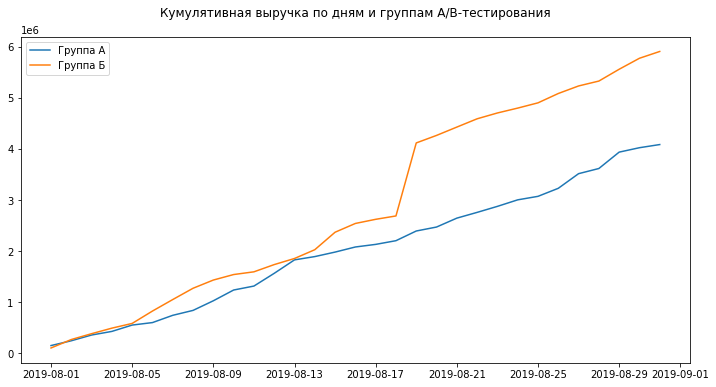

In [ ]:
plt.figure(figsize=(12,6))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам A/B-тестирования', pad=20)
plt.legend(['Группа А', 'Группа Б']);

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Однако график выручки группы Б в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

## 3.2. График кумулятивного среднего чека по группам

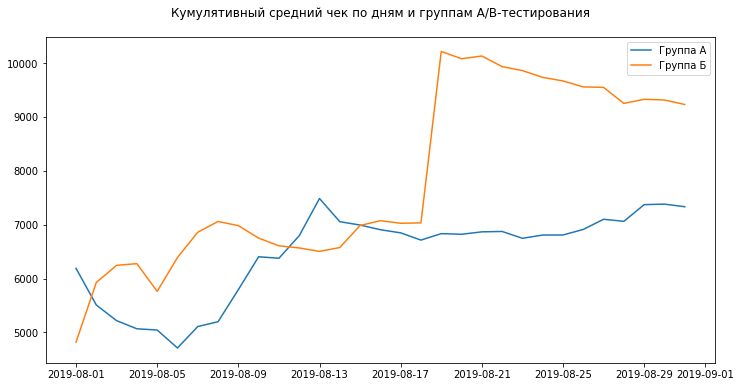

In [ ]:
# разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования', pad=20)
plt.legend(['Группа А', 'Группа Б']);

Средний чек становится равномерным ближе к концу теста: установился для группы A и падает для группы B. Возможно, в группу B в районе 18 августа попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

## 3.3. График относительного изменения кумулятивного среднего чека группы B к группе A

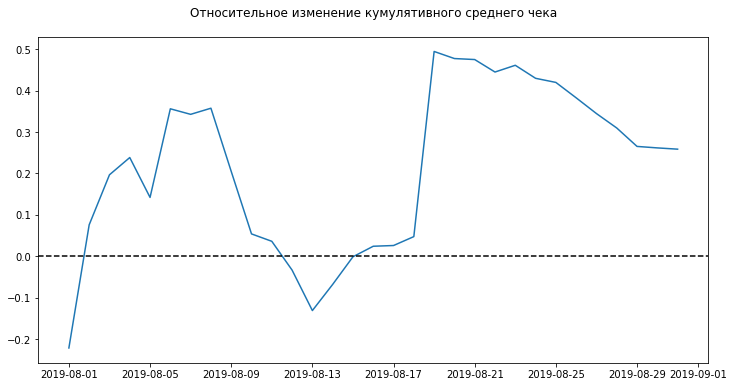

In [ ]:
plt.figure(figsize=(12,6))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего чека', pad=20);

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!

## 3.4. График кумулятивной конверсии по группам

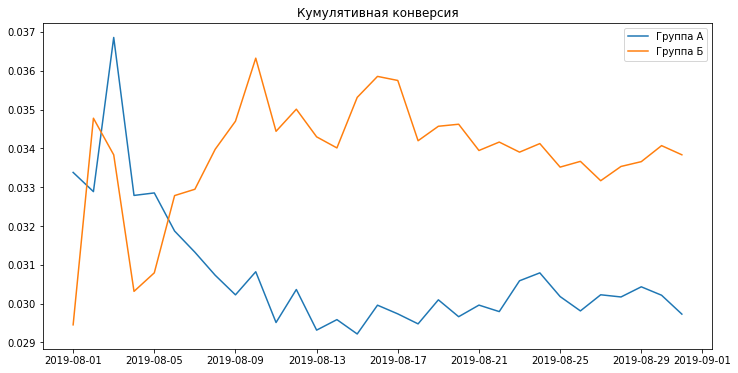

In [ ]:
plt.figure(figsize=(12,6))

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(['Группа А', 'Группа Б'])


plt.title('Кумулятивная конверсия');

Симметричный график получился! Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась. На протяжении всего теста конверсия В лучше А

## 3.5. График относительного изменения кумулятивной конверсии группы B к группе A

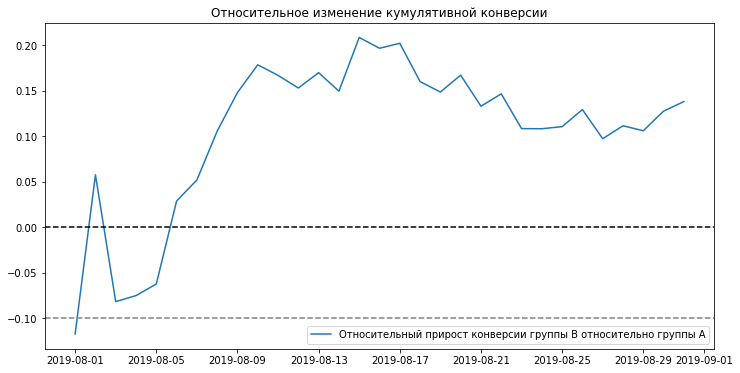

In [ ]:
plt.figure(figsize=(12,6))

# построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title('Относительное изменение кумулятивной конверсии');

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия с середины периода снова падала, а к концу - постепенно растёт. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.

## 3.6. Точечный график количества заказов по пользователям.

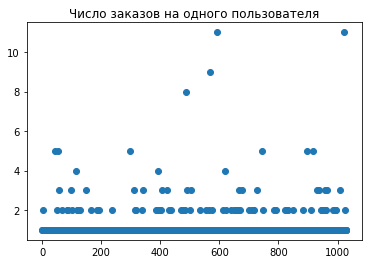

In [ ]:
# подсчитаем количество заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['userid', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

# построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Число заказов на одного пользователя');

Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

## 3.7. 95-й и 99-й перцентили количества заказов на пользователя

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

## 3.8.Точечный график стоимостей заказов

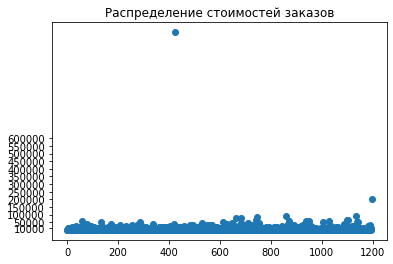

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.yticks([10000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000])
plt.title('Распределение стоимостей заказов');

Есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 10 000 и 50 000 рублей.

## 3.9. 95-й и 99-й перцентили стоимости заказов

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58000 рублей. Разумно выбрать 28000 за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

## 3.10. Статистическая значимость различий в конверсии между группами по «сырым» данным

Сформулируем гипотезы. 
- Нулевая: различий в конверсии между группами нет. 
- Альтернативная: различия в конверсии между группами есть.

In [ ]:
# соберем все данные в одну таблицу

# visitorsPerDateA — количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# visitorsPerDateB — количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# ordersPerDateA - количество заказов в выбранную дату в группе A
# # revenuePerDateA — суммарная выручка в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A
# revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# ordersPerDateB — количество заказов в выбранную дату в группе B
# revenuePerDateB — суммарная выручка в выбранную дату в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B
# revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединим таблицы 
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [ ]:
# посчитаем статистическую значимость различия конверсии между группами
# конверсия
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']
 
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# тем, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [ ]:
# p-value
"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1])

'0.01679'

In [ ]:
# относительный выигрыш группы B
"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)

'0.138'

По конверсии можно сделать вывод, что конверсия группы В лучше группы А. P-value меньше 0.05, значит отвергаем нулевую гипотезу.

## 3.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
# проверим статистическую значимость различий в среднем чеке 
# средний чек
# p-value
"{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.729'

In [ ]:
# относительный выигрыш группы B
"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.259'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Плюс, средний чек группы B значительно выше среднего чека группы A.

## 3.12. Статистическая значимость различий в конверсии между группами по «очищенным» данным

Выше мы обнаружили, что 95-й и 99-й перцентили средних чеков равны 28000 и 58000 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape[0]

74

Всего 74 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

In [ ]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0)

In [ ]:
# p-value
'{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.01304'

In [ ]:
# относительный выигрыш группы B
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.173'

Результаты практически не изменились. P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем

## 3.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
# p-value
'{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'],)[1])

'0.738'

In [ ]:
# относительный выигрыш группы B
"{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean()- 1)

'-0.020'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы B изменился, теперь он ниже среднего чека группы A.

# 4. Решение по результатам теста

- обнаружены статистически значимые различия в конверсии между группами и по «сырым», и по данным после фильтрации аномалий
- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
- график различия конверсии между группами сообщает, что результаты группы B выше группы A
- график различия среднего чека говорит о том, что результаты группы B в целом выше группы А. Но при очищении данных мы обнаружили падение относительного различия среднего чека между сегментами с 26% до 2%.
- исходя из обнаруженных фактов, предлагается остановить тест, признать его успешным и перейти к проверке следующей гипотезы

**Описание шагов исследования**

1. Загрузка данных и подготовка их к анализу 
- обзор данных
- предобработка данных

2. Приоритизация гипотез
- изучение 9 гипотез по увеличению выручки интернет-магазина

3. Анализ A/B-теста
- график кумулятивной выручки по группам
- график кумулятивного среднего чека по группам
- график относительного изменения кумулятивного среднего чека группы B к группе A
- график кумулятивной конверсии по группам
- график относительного изменения кумулятивной конверсии группы B к группе A
- точечный график количества заказов по пользователям
- 95-й и 99-й перцентили количества заказов на пользователя
- точечный график стоимостей заказов
- 95-й и 99-й перцентили стоимости заказов
- статистическая значимость различий в конверсии между группами по «сырым» данным
- статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
- статистическая значимость различий в конверсии между группами по «очищенным» данным
- статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

4. Решение по результатам теста